<a href="https://colab.research.google.com/github/mittshah2/Skin-Disease-Prediction-Web-Application/blob/master/HAM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as p
import PIL as pil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,normalize
import cv2
from tqdm import tqdm

In [0]:
# !unzip -uq 'drive/My Drive/Actinic keratoses.zip' -d '/'
# !unzip -uq 'drive/My Drive/Basal cell carcinoma.zip' -d '/'
# !unzip -uq 'drive/My Drive/Benign keratosis-like lesions.zip' -d '/'
# !unzip -uq 'drive/My Drive/Melanocytic nevi.zip' -d '/'
# !unzip -uq 'drive/My Drive/Dermatofibroma.zip' -d '/'
# !unzip -uq 'drive/My Drive/Melanoma.zip' -d '/'
# !unzip -uq 'drive/My Drive/Vascular lesions.zip' -d '/'

In [0]:
datagen=ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')

In [0]:
input_shape=(224,224,3)

In [0]:
df=pd.read_csv('drive/My Drive/HAM/HAM10000_metadata.csv')
key={
    'akiec':0,
     'bcc':1,
     'bkl':2,
     'df':3,
     'nv':4,
     'mel':5,
     'vasc':6
}
df['label']=df['dx'].map(key)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Actinic keratoses')):
#   path='/Actinic keratoses/'+str(i)
#   img=cv2.imread(path)  
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.asarray(data)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Basal cell carcinoma')):
#   path='/Basal cell carcinoma/'+str(i)
#   img=cv2.imread(path)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.append(x,data,axis=0)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Benign keratosis-like lesions')):
#   path='/Benign keratosis-like lesions/'+str(i)
#   img=cv2.imread(path)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.append(x,data,axis=0)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Dermatofibroma')):
#   path='/Dermatofibroma/'+str(i)
#   img=cv2.imread(path)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.append(x,data,axis=0)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Melanocytic nevi')):
#   path='/Melanocytic nevi/'+str(i)
#   img=cv2.imread(path)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.append(x,data,axis=0)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Melanoma')):
#   path='/Melanoma/'+str(i)
#   img=cv2.imread(path)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.append(x,data,axis=0)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Vascular lesions')):
#   path='/Vascular lesions/'+str(i)
#   img=cv2.imread(path)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.append(x,data,axis=0)

In [0]:
# x.shape

In [0]:
# np.save('drive/My Drive/HAM/data of ham(224x224).npy',x)

In [0]:
x=np.load('drive/My Drive/HAM/data of ham(224x224).npy')

In [38]:
y=[]
for i in range(130):
  y.append(0)
for i in range(514):
  y.append(1)
for i in range(1176):
  y.append(2)
for i in range(115):
  y.append(3)
for i in range(6705):
  y.append(4)
for i in range(1113):
  y.append(5)
for i in range(142):
  y.append(6)
len(y)

9895

In [39]:
y=np.asarray(y)
y.shape

(9895,)

In [0]:
y=to_categorical(y)

In [0]:
from sklearn.model_selection import train_test_split

trainx,trainy,testx,testy = train_test_split(x,y,test_size=0.02,random_state=42)

In [0]:
datagen.fit(trainx)

In [43]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import RMSprop

model=Sequential(name='HAM')

model.add(Conv2D(64,(2,2),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Conv2D(256,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Conv2D(512,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Conv2D(512,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Conv2D(512,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Dropout(0.4))


model.add(Flatten())


model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',Recall()])
model.summary()

Model: "HAM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 223, 223, 64)      832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 110, 110, 256)     65792     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 55, 55, 256)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 55, 55, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 54, 54, 512)       524800    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 512)       0       

In [0]:
trainx=trainx/255

In [0]:
trainy=trainy/255

In [0]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early=EarlyStopping(monitor='accuracy',patience=3,mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, verbose=1,cooldown=0, mode='auto',min_delta=0.0001, min_lr=0)
batch_size=90

In [47]:
model.fit(trainx, testx,epochs=20,batch_size=batch_size,validation_data=(trainy, testy),callbacks=[early,reduce_lr])

Epoch 1/20
108/108 [==============================] - 42s 389ms/step - loss: 1.2931 - accuracy: 0.6675 - recall_1: 0.5471 - val_loss: 1.0064 - val_accuracy: 0.6818 - val_recall_1: 0.4495 - lr: 0.0010
Epoch 2/20
108/108 [==============================] - 41s 375ms/step - loss: 0.9276 - accuracy: 0.6787 - recall_1: 0.5610 - val_loss: 1.0214 - val_accuracy: 0.6869 - val_recall_1: 0.4444 - lr: 0.0010
Epoch 3/20
108/108 [==============================] - 40s 375ms/step - loss: 0.8852 - accuracy: 0.6814 - recall_1: 0.5700 - val_loss: 0.9048 - val_accuracy: 0.7020 - val_recall_1: 0.4697 - lr: 0.0010
Epoch 4/20
108/108 [==============================] - 41s 375ms/step - loss: 0.8185 - accuracy: 0.7004 - recall_1: 0.5742 - val_loss: 0.7663 - val_accuracy: 0.7475 - val_recall_1: 0.6111 - lr: 0.0010
Epoch 5/20
108/108 [==============================] - 40s 375ms/step - loss: 0.7876 - accuracy: 0.7090 - recall_1: 0.5928 - val_loss: 0.7870 - val_accuracy: 0.7374 - val_recall_1: 0.5606 - lr: 0.0010


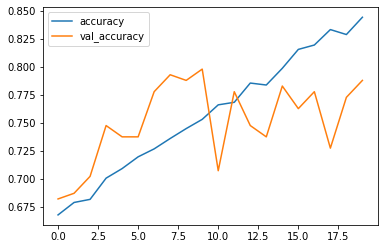

In [48]:
loss=pd.DataFrame(model.history.history)
loss=loss[['accuracy','val_accuracy']]
loss.plot()

In [0]:
# model.save('drive/My Drive/model/model.h5')